Importar librerías necesarias

In [3]:
# Importación de bibliotecas necesarias
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar modelo de idioma de spaCy
nlp = spacy.load("en_core_web_sm")

Cargar el Dataset

In [4]:
# Cargar el dataset
df = pd.read_csv('../data/youtube_cln_proc.csv', index_col=False) 
df.head(2)

,IsToxic,processed_text
0,False,people step case not people situation lump mes...
1,True,law enforcement train shoot apprehend train sh...


### Vectorización de Texto con TF-IDF

Convertir el texto preprocesado en una representación numérica usando TF-IDF

In [3]:
# Vectorización con TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

# Definir la variable objetivo (target)
y = df['IsToxic']  

print(f"X: {X}\n" )
print(f"y: {y}\n" )

X: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13300 stored elements and shape (999, 3513)>
  Coords	Values
  (0, 2274)	0.23069603510185147
  (0, 2970)	0.09905478481290517
  (0, 446)	0.07603367867551696
  (0, 2133)	0.044179447885470444
  (0, 2844)	0.08348201619357815
  (0, 1858)	0.12261547420222314
  (0, 1945)	0.10132421023479603
  (0, 1913)	0.07257342385593203
  (0, 1375)	0.07603367867551696
  (0, 1879)	0.07659095630163322
  (0, 1725)	0.09905478481290517
  (0, 2443)	0.14174492190706622
  (0, 2760)	0.11572441431027822
  (0, 2528)	0.10704270558289614
  (0, 3145)	0.11572441431027822
  (0, 1639)	0.11083512950756415
  (0, 1361)	0.06293519728474464
  (0, 3351)	0.06194967804413073
  (0, 1405)	0.12261547420222314
  (0, 983)	0.12261547420222314
  (0, 1504)	0.12261547420222314
  (0, 3382)	0.06757269311373901
  (0, 1402)	0.1669640323871563
  (0, 1293)	0.06171197563969731
  (0, 2392)	0.10704270558289614
  :	:
  (995, 3208)	0.20834700241988574
  (995, 295)	0.22160478995213273
  (

### Dividir el Dataset en Entrenamiento y Prueba

Dividir los datos en conjuntos de entrenamiento y prueba, por ejemplo, en un 80%-20%.

In [4]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Entrenamiento del Modelo con Naive Bayes

Entrenar un modelo Naive Bayes en el conjunto de entrenamiento.

In [5]:
# Crear el modelo Naive Bayes y entrenarlo
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

### Evaluación y Detección de Overfitting

Comprobar el rendimiento del modelo en los conjuntos de entrenamiento y prueba.

In [6]:
# Precisión en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, model.predict(X_train))

# Precisión en el conjunto de prueba
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")

# Calcular la diferencia entre la precisión de entrenamiento y prueba (overfitting)
overfitting = train_accuracy - test_accuracy
print(f"Overfitting: {overfitting * 100:.2f}%")


Accuracy en entrenamiento: 95.24%
Accuracy en prueba: 65.00%
Overfitting: 30.24%


### Evaluación Adicional y Reducción del Overfitting

Usar validación cruzada y, en caso de overfitting alto, podemos aplicar técnicas de ajuste como selección de características o regularización.

In [7]:
# Validación cruzada para evaluar el modelo y reducir overfitting
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Promedio de Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")

# Si overfitting > 5%, se podrían ajustar los hiperparámetros, aplicar regularización, o reducir la dimensionalidad


Cross-Validation Accuracy Scores: [0.66       0.715      0.72       0.695      0.61809045]
Promedio de Cross-Validation Accuracy: 68.16%


### Matriz de Confusión y Reporte de Clasificación

Para entender mejor el rendimiento del modelo, visualizamos la matriz de confusión.

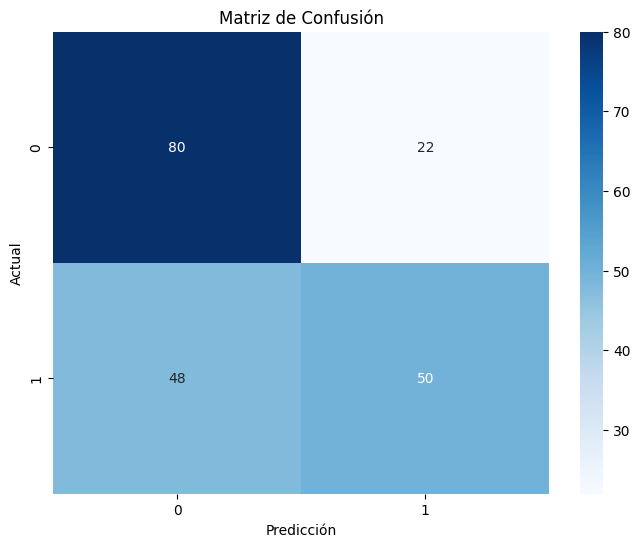

              precision    recall  f1-score   support

       False       0.62      0.78      0.70       102
        True       0.69      0.51      0.59        98

    accuracy                           0.65       200
   macro avg       0.66      0.65      0.64       200
weighted avg       0.66      0.65      0.64       200



In [8]:
# Matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


## Reducción del Overfitting

1. Técnica de reducción de la dimensionalidad
2. Entrenar con Naive Bayes Complementario (Regularización)

#### 1. Reducir la Dimensionalidad con Selección de Características

Para simplificar la representación del texto, reduciremos el número de términos mediante max_features en el vectorizador TF-IDF y un min_df para ignorar términos muy poco frecuentes.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Reducimos el número de características manteniendo los términos más informativos
vectorizer = TfidfVectorizer(max_features=500, min_df=5, max_df=0.7)  # 500 es un número sugerido, puedes ajustarlo
X_reduced = vectorizer.fit_transform(df['processed_text'])

# Volvemos a dividir el conjunto reducido en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


#### 2. Entrenar con Naive Bayes Complementario (Regularización)

Entrenamos el modelo con ComplementNB, una variante de Naive Bayes que suele ser más robusta ante el overfitting en datos de texto.

In [10]:
from sklearn.naive_bayes import ComplementNB

# Entrenar el modelo Complement Naive Bayes
model = ComplementNB()
model.fit(X_train, y_train)

# Evaluamos la precisión en entrenamiento y prueba para verificar la reducción del overfitting
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
overfitting = train_accuracy - test_accuracy

print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")


Accuracy en entrenamiento: 84.73%
Accuracy en prueba: 66.50%
Overfitting: 18.23%


#### 3. Validación Cruzada

Realizamos validación cruzada para evaluar el nuevo modelo y confirmar que el overfitting está bajo control.

In [11]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_reduced, y, cv=5)
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Promedio de Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Accuracy Scores: [0.645      0.73       0.725      0.665      0.62311558]
Promedio de Cross-Validation Accuracy: 67.76%


#### 4. Matriz de confusión

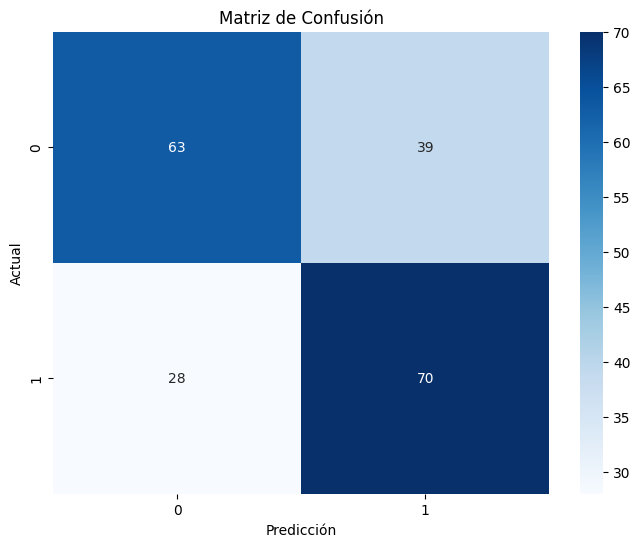

              precision    recall  f1-score   support

       False       0.69      0.62      0.65       102
        True       0.64      0.71      0.68        98

    accuracy                           0.67       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.67      0.66       200



In [12]:
# Matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Ajustar los Hiperparámetros del Modelo ComplementNB

El modelo ComplementNB tiene hiperparámetros que se pueden ajustar, principalmente:

- ***alpha***: controla la suavización. Un valor mayor regulariza más el modelo, lo cual ayuda a reducir el sobreajuste. Generalmente, valores entre 0.5 y 2 funcionan bien para datos de texto.

- ***norm***: Si se establece en True, normaliza las características, lo cual puede mejorar el rendimiento en datos TF-IDF.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import ComplementNB

# Definir la cuadrícula de hiperparámetros a probar
param_grid = {
    'alpha': [0.5, 1, 1.5, 2],
    'norm': [True, False]
}

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(ComplementNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo con los mejores parámetros encontrados
best_model = grid_search.best_estimator_

# Recalcular precisión y overfitting
train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
overfitting = train_accuracy - test_accuracy

print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")


Mejores hiperparámetros: {'alpha': 1.5, 'norm': False}
Accuracy en entrenamiento: 84.36%
Accuracy en prueba: 67.00%
Overfitting: 17.36%


#### 1. Aplicar Técnicas de Reducción de Dimensionalidad Avanzadas

Si la reducción de características inicial no es suficiente, podemos usar métodos de selección de características adicionales para reducir aún más la dimensionalidad. Algunas opciones son:

- ***Chi-Squared***: Seleccionar características más relevantes basadas en la relación de las características con la variable objetivo.

- ***SVD (Singular Value Decomposition)***: Aplicar **TruncatedSVD** (a veces conocido como LSA - Latent Semantic Analysis en textos) para reducir la dimensionalidad de la matriz TF-IDF.

In [14]:
from sklearn.decomposition import TruncatedSVD

# Reducir a 100 componentes latentes (ajustar este valor según los resultados)
svd = TruncatedSVD(n_components=100, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Entrenar con los datos reducidos
best_model.fit(X_train_reduced, y_train)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, best_model.predict(X_train_reduced))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_reduced))
overfitting = train_accuracy - test_accuracy

print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")


ValueError: Negative values in data passed to ComplementNB (input X)

## **NOTAS**

**ComplementNB** no permite valores negativos en sus entradas, mientras que TruncatedSVD puede producir componentes con valores negativos. Esto se debe a que TruncatedSVD reduce las dimensiones de la matriz de manera similar a la descomposición en valores singulares (SVD), generando tanto valores positivos como negativos.

**Soluciones Alternativas**
Existen dos maneras de solucionar este problema:

1. Usar **PCA** en lugar de TruncatedSVD: Si convertimos X_train a una matriz densa antes de aplicar PCA, podremos reducir las dimensiones sin obtener valores negativos. Ten en cuenta que este método es más intensivo en memoria y podría no ser ideal para matrices de datos grandes y dispersos.

2. Aplicar una **transformación de valor absoluto**: Para mantener TruncatedSVD, puedes aplicar una transformación de valor absoluto en los datos reducidos después de la reducción de dimensiones para eliminar los valores negativos.

#### Opción 1: Cambiar a PCA en lugar de TruncatedSVD

In [15]:
from sklearn.decomposition import PCA

# Convertir a matriz densa antes de aplicar PCA
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Aplicar PCA para reducir dimensionalidad
pca = PCA(n_components=100, random_state=42)
X_train_reduced = pca.fit_transform(X_train_dense)
X_test_reduced = pca.transform(X_test_dense)

# Entrenar el modelo con el conjunto reducido
best_model.fit(X_train_reduced, y_train)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, best_model.predict(X_train_reduced))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_reduced))
overfitting = train_accuracy - test_accuracy

print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")


ValueError: Negative values in data passed to ComplementNB (input X)

#### Opción 1.1: Utilizar ***SelectKBest*** para Reducción de Dimensionalidad

En lugar de PCA o TruncatedSVD, se puede aplicar SelectKBest, una técnica de selección de características basada en puntuaciones estadísticas, para reducir la dimensionalidad de la matriz TF-IDF de forma que ComplementNB no tenga problemas con valores negativos.

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

# Reducir dimensionalidad con SelectKBest utilizando chi-cuadrado
selector = SelectKBest(chi2, k=500)  # Ajusta 'k' según los resultados de prueba
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

# Entrenar el modelo con el conjunto reducido
best_model.fit(X_train_reduced, y_train)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, best_model.predict(X_train_reduced))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_reduced))
overfitting = train_accuracy - test_accuracy

print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")


Accuracy en entrenamiento: 84.36%
Accuracy en prueba: 67.00%
Overfitting: 17.36%


#### Opción 2: Aplicar la Transformación de Valor Absoluto

In [17]:
from sklearn.decomposition import TruncatedSVD

# Aplicar TruncatedSVD para reducir la dimensionalidad
svd = TruncatedSVD(n_components=100, random_state=42)
X_train_reduced = svd.fit_transform(X_train)
X_test_reduced = svd.transform(X_test)

# Convertir a valores absolutos para evitar valores negativos
X_train_reduced = abs(X_train_reduced)
X_test_reduced = abs(X_test_reduced)

# Entrenar el modelo con los datos reducidos sin valores negativos
best_model.fit(X_train_reduced, y_train)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, best_model.predict(X_train_reduced))
test_accuracy = accuracy_score(y_test, best_model.predict(X_test_reduced))
overfitting = train_accuracy - test_accuracy

print(f"Accuracy en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Accuracy en prueba: {test_accuracy * 100:.2f}%")
print(f"Overfitting: {overfitting * 100:.2f}%")


Accuracy en entrenamiento: 66.83%
Accuracy en prueba: 63.50%
Overfitting: 3.33%


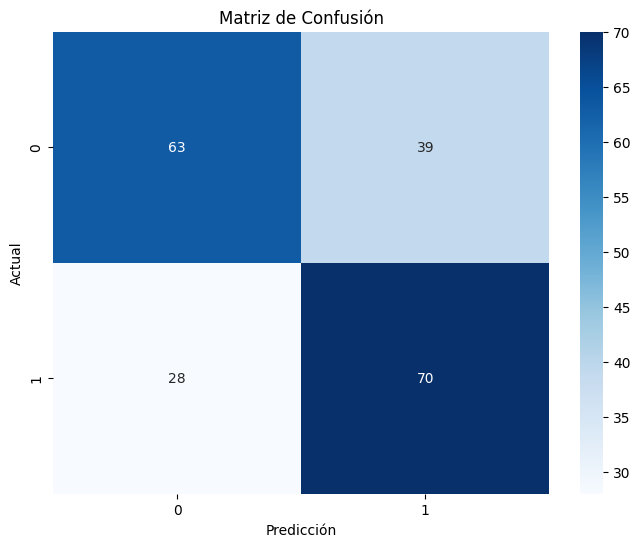

In [18]:
# Matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Actual")
plt.show()

# Reporte de clasificación